In [35]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from glob import glob

In [17]:
tmp_dir = r"D:\Projects\eruption-forecast\output\forecast\VG.OJN.00.EHZ\tremor\_tmp"
figures_dir = r"D:\Projects\eruption-forecast\output\figures\_tmp"

In [18]:
os.makedirs(figures_dir, exist_ok=True)

In [19]:
files = glob(os.path.join(tmp_dir, "*.csv"))

In [ ]:
def plot_df(df: pd.DataFrame, start_date: str, filepath: str) -> None:
    columns = df.columns
    n_rows = len(columns)
    fig, axs = plt.subplots(nrows=n_rows, ncols=1, figsize=(10, 1.2*n_rows), sharex=True)

    for col_index, column in enumerate(columns):
        ax = axs[col_index]
        ax.plot(
			df.index,
			df[column],
			color="black",
			linewidth=1,
			label=column,
			alpha=0.8,
		)
        ax.set_xlim(df.index[0], df.index[-1])

        ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

        # ax.grid(True)
        ax.legend(loc="upper left", fontsize=8, frameon=False)

        for label in ax.get_xticklabels(which="major"):
            label.set(rotation=45, horizontalalignment="right")

	plt.suptitle(f"Date: {start_date}", y=0.0)
	plt.tight_layout()
	plt.savefig(filepath, dpi=72)

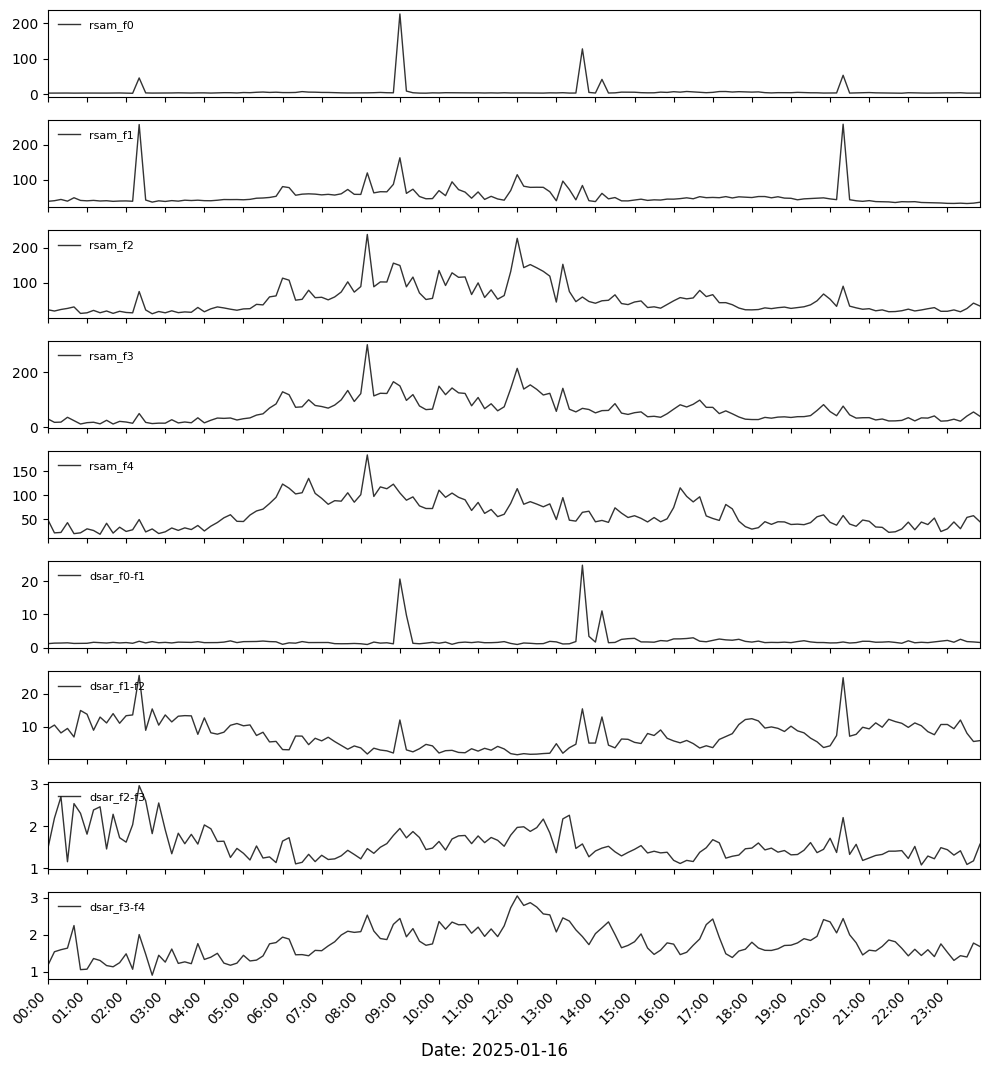

In [70]:
if len(files) > 0:
    for file in files:
        df = pd.read_csv(file, index_col=0, parse_dates=True)
        start_date: pd.Timestamp = df.index[0]
        start_date_str = start_date.strftime("%Y-%m-%d")

        figure_filename = f"{start_date_str}.jpg"
        figure_filepath = os.path.join(figures_dir, figure_filename)

        if os.path.exists(figure_filepath):
            continue

        plot_df(df, start_date_str, figure_filepath)
        break

In [25]:
figure_dir

'D:\\Projects\\eruption-forecast\\output\\figures\\_tmp\\2025-01-01'